Experiment with the copulpy package
===

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from copulpy.tests.test_auxiliary import generate_random_request
from copulpy.clsUtilityCopula import UtilityCopulaCls
from copulpy.shared.auxiliary import distribute_copula_spec
from copulpy.shared.auxiliary import build_copula_spec

np.random.seed(123)

In [2]:
for _ in range(1):
    x, y, is_normalized, copula_spec = generate_random_request({'version': 'nonstationary'})

    copula = UtilityCopulaCls(copula_spec)
    util = copula.evaluate(x, y, is_normalized)

    alpha, beta, gamma, y_scale, version = \
        distribute_copula_spec(copula_spec, 'alpha', 'beta', 'gamma', 'y_scale', 'version')

    print('version: {}'.format(version))
    print('alpha: {0:.2f}, beta: {1:.2f}, gamma: {2:.2f}, y_scale: {3:.2f}'.format(
        alpha, beta, gamma, y_scale)
    )
    print('x: {0:.2f}, y: {1:.2f}, utility: {2:.2f}.'.format(x, y, util))

    # Don't expect monotonicity here
    print(copula.evaluate(x, y))
    print(copula.evaluate(x, y, t=0))
    print(copula.evaluate(x, y, t=1))
    print(copula.evaluate(x, y, t=3))
    print(copula.evaluate(x, y, t=6))
    print(copula.evaluate(x, y, t=12))
    print(copula.evaluate(x, y, t=24))

    print('\n')

version: nonstationary
alpha: 0.82, beta: 0.57, gamma: 0.54, y_scale: 5.74
x: 1.75, y: 5.32, utility: 10.52.
10.51887419241028
10.51887419241028
8.776877127576725
11.925862220089323
10.324311384421291
9.131944372549704
8.583021663968




In [4]:
# Create an instance of the copula class by hand.

copula_spec = build_copula_spec(version='nonstationary',
                                alpha = 0.8,
                                beta = 0.7,
                                gamma = 0.6,
                                discount_factors = {0: 1, 1: 0.95, 3: 0.9, 6: 0.8, 12: 0.7, 24: 0.4},
                                y_scale = 0.5,
                                )

copula = UtilityCopulaCls(copula_spec)
print(copula.evaluate(10, 100))

10.039717424818031


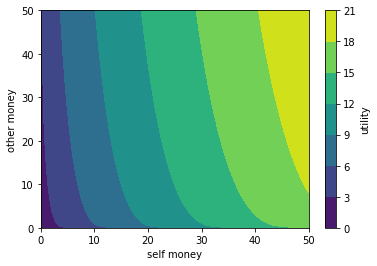

In [12]:
# Plot the copula

# Vectorize evaluation
eval_copula_self = lambda x, y: copula.evaluate(x, y)
vec_eval_copula = np.vectorize(eval_copula_self)

# Make 2D grid
nx, ny = (100, 100)
x = np.linspace(0, 50, nx)
y = np.linspace(0, 50, ny)
xv, yv = np.meshgrid(x, y)

# Evaluate copula
z = vec_eval_copula(xv, yv)

# Plot surface
plt.interactive(True)
plt.subplots()
plt.contourf(x,y,z)
plt.xlabel('self money')
plt.ylabel('other money')
cbar = plt.colorbar()
cbar.set_label('utility')

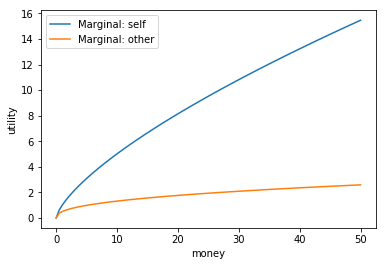

In [17]:
# Plot marginals

# Vectorize evaluation
marginal_self = lambda x: copula.evaluate(x, 0)
marginal_other = lambda y: copula.evaluate(0, y)
vec_marginal_self = np.vectorize(marginal_self)
vec_marginal_other = np.vectorize(marginal_other)

# Make 1D grid
nx = 100
xgrid = np.linspace(0, 50, nx)

# Plot marginals
plt.subplots()
plt.plot(xgrid, vec_marginal_self(xgrid), label="Marginal: self")
plt.plot(xgrid, vec_marginal_other(xgrid), label="Marginal: other")
plt.xlabel('money')
plt.ylabel('utility')
plt.legend()

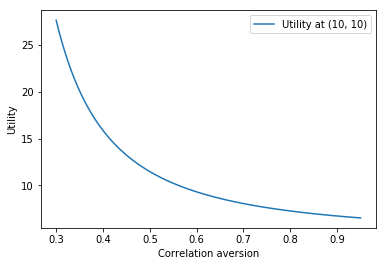

In [29]:
# Plot function for various correlation aversions (alpha)

copula_alpha = lambda x: build_copula_spec(version='nonstationary',
                                alpha = x,
                                beta = 0.7, gamma = 0.6,
                                discount_factors = {0: 1, 1: 0.95, 3: 0.9, 6: 0.8, 12: 0.7, 24: 0.4},
                                y_scale = 0.5,
                                )

eval_copula_alpha = lambda x: UtilityCopulaCls(copula_alpha(x)).evaluate(10, 10)

vec_eval_alpha = np.vectorize(eval_copula_alpha)

# preparations
nx = 100
xgrid = np.linspace(0.3, 0.95, nx)
ygrid = vec_eval_alpha(xgrid)

# Plot
plt.subplots()
plt.plot(xgrid, ygrid, label="Utility at (10, 10)")
plt.xlabel('Correlation aversion')
plt.ylabel('Utility')
plt.legend()